In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/Google.csv')
df


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2013/01/02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
1,1,2013/01/03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2,2,2013/01/04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
3,3,2013/01/07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
4,4,2013/01/08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956
...,...,...,...,...,...,...,...,...
2531,2531,2023/01/23,97.949997,100.040001,97.500000,99.790001,99.790001,40005100
2532,2532,2023/01/24,98.099998,99.610001,97.199997,97.699997,97.699997,33078500
2533,2533,2023/01/25,95.570000,96.160004,93.760002,95.220001,95.220001,42330000
2534,2534,2023/01/26,96.500000,97.570000,95.379997,97.519997,97.519997,30114000


In [5]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2013/01/02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
1,1,2013/01/03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2,2,2013/01/04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
3,3,2013/01/07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
4,4,2013/01/08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956


In [6]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
2531,2531,2023/01/23,97.949997,100.040001,97.500000,99.790001,99.790001,40005100
2532,2532,2023/01/24,98.099998,99.610001,97.199997,97.699997,97.699997,33078500
2533,2533,2023/01/25,95.570000,96.160004,93.760002,95.220001,95.220001,42330000
2534,2534,2023/01/26,96.500000,97.570000,95.379997,97.519997,97.519997,30114000
2535,2535,2023/01/27,97.309998,100.320000,97.309998,99.370003,99.370003,33850200


In [7]:
df.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
count,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2.536000e+03
mean,1267.500000,59.746815,60.350351,59.126071,59.752340,59.752340,4.277325e+07
std,732.224465,34.629696,35.037901,34.204419,34.622387,34.622387,2.692419e+07
min,0.000000,17.634134,17.651152,17.405405,17.589338,17.589338,9.312000e+06
25%,633.750000,30.427364,30.636137,30.285035,30.470658,30.470658,2.686500e+07
50%,1267.500000,52.257750,52.703001,51.505501,52.189501,52.189501,3.436300e+07
75%,1901.250000,74.542501,75.379124,73.883247,74.422125,74.422125,4.887500e+07
max,2535.000000,151.250000,151.546494,148.899002,149.838501,149.838501,4.621933e+08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2536 non-null   int64  
 1   Date        2536 non-null   object 
 2   Open        2536 non-null   float64
 3   High        2536 non-null   float64
 4   Low         2536 non-null   float64
 5   Close       2536 non-null   float64
 6   Adj Close   2536 non-null   float64
 7   Volume      2536 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 158.6+ KB


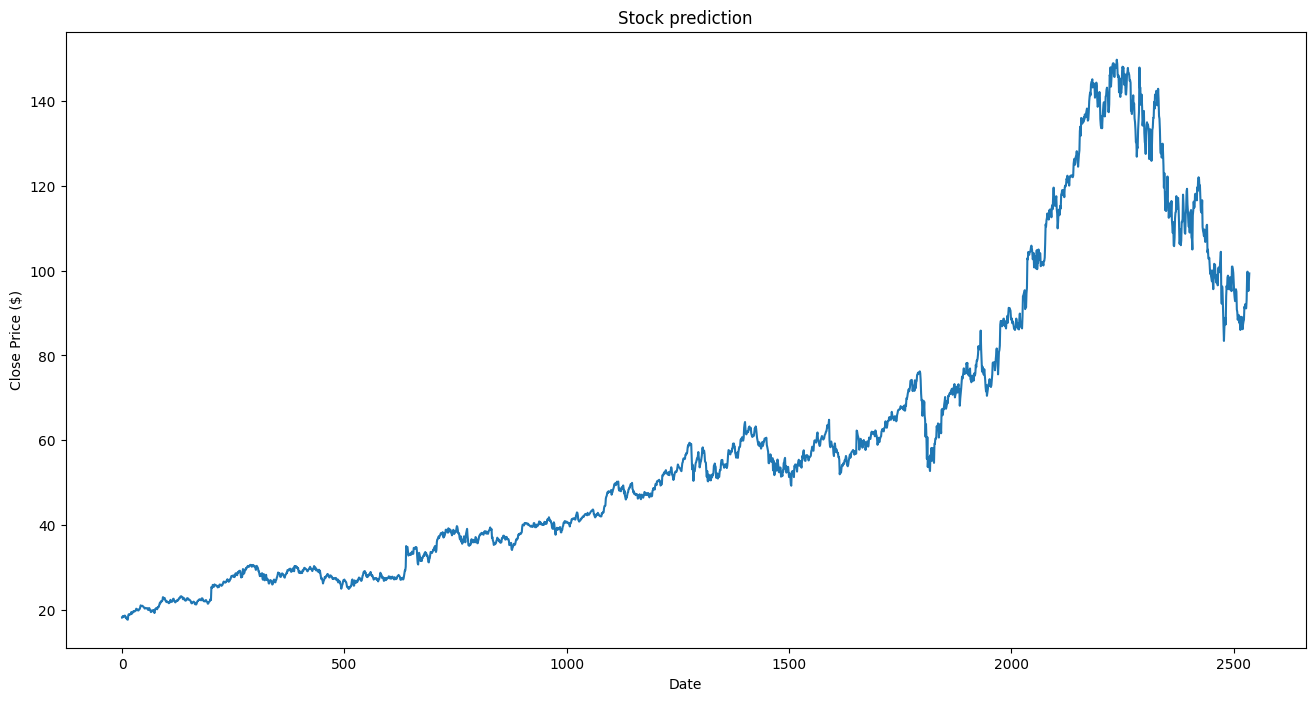

In [9]:
plt.figure(figsize=(16,8))
plt.title('Stock prediction')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(df["Close"])
plt.show()



In [10]:
df.shape

(2536, 8)

In [11]:
data=df.filter(['Close'])
dataset=data.values


In [12]:
from keras.layers.attention.multi_head_attention import math
training_data_len=math.ceil(len(dataset)*.8)
training_data_len



2029

In [13]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)
scaled_data


array([[0.00385643],
       [0.00393591],
       [0.00664186],
       ...,
       [0.58700306],
       [0.60439444],
       [0.61838323]])

In [14]:
train_data=scaled_data[0:training_data_len , :]
x_train =[]
y_train =[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()



[array([0.00385643, 0.00393591, 0.00664186, 0.00603254, 0.00575817,
       0.00667024, 0.00730604, 0.00702409, 0.00385643, 0.00417434,
       0.00233128, 0.00159897, 0.00031034, 0.        , 0.00730981,
       0.00971489, 0.00961271, 0.00905638, 0.0096146 , 0.00964298,
       0.00999495, 0.01376243, 0.01062506, 0.01189667, 0.01273494,
       0.01345022, 0.01561118, 0.01505296, 0.01472749, 0.01513622,
       0.01607479, 0.01703417, 0.01967576, 0.0169528 , 0.01753371,
       0.01832468, 0.01663301, 0.0165119 , 0.01833794, 0.01860664,
       0.01955087, 0.02244793, 0.0256837 , 0.02431749, 0.02454835,
       0.02434398, 0.02496843, 0.0236041 , 0.02316887, 0.0224555 ,
       0.0210855 , 0.01985364, 0.0205216 , 0.02116308, 0.02051025,
       0.02033049, 0.0202037 , 0.02072976, 0.01888291, 0.01728015])]
[0.018604749704589835]



In [15]:
x_train,y_train=np.array(x_train),np.array(y_train)


In [16]:
x_train =np.reshape(x_train, newshape= (x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1969, 60, 1)

In [17]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [19]:
model.fit(x_train, y_train, epochs=1, batch_size=1)


1969/1969 [==============================] - 54s 25ms/step - loss: 5.9336e-04


In [20]:
test_data =scaled_data[training_data_len - 60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [21]:
x_test =np.array(x_test)

In [22]:
x_test= np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [23]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 16ms/step


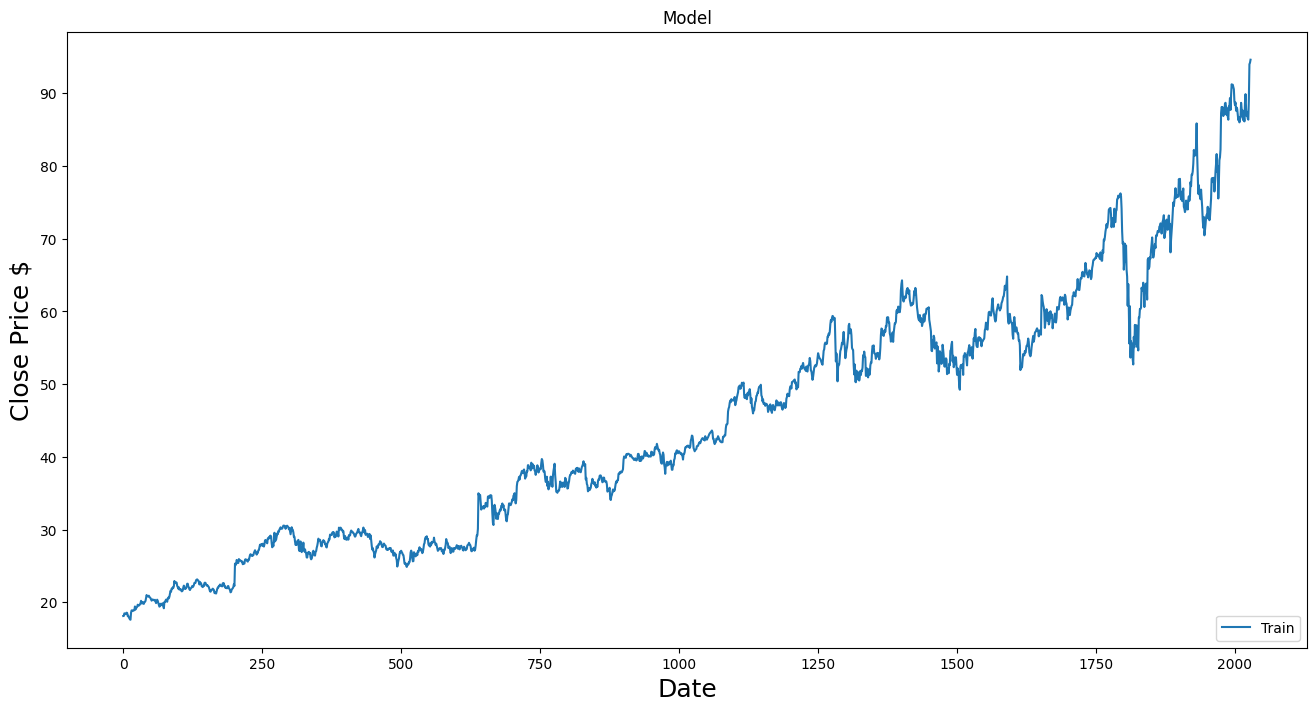

In [24]:
train=data[:training_data_len]
valid=data[training_data_len:]

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price $',fontsize=18)
plt.plot(train['Close'])

plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()